In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Cluster methods like K-Means have hard boundaries. The data point either belongs to or doe not belong to a certain cluster. On the other hand, cluster methods like GMM have soft boundaries. Data points can simultaneously belong to multiple clusters but with different probabilities. 

GMM can also be used to detect outliers. Since there is likelihood of association of each data point to a particular cluster, the points with relatively low likelihood can be treated as outliers.

In GMM, each cluster corresponds to a probability function - that of the Gaussian distribution. We want to learn the mean, $\mu$ and variance $\sigma^{2}$. The mathematical form of the Gaussian distribution in 1-dimension is -

$$ N(x | \mu, \sigma) = \frac{1}{\sigma \sqrt(2\pi)} e^{\frac{-(x - \mu)^{2}}{2 \sigma^{2}}}$$

This is also called a Univariate Gaussian.

For a d-dimensional Gaussian distribution - 

$$ N(x | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} \sqrt|\Sigma|} exp(-\frac{1}{2}(x - \mu)^{T} \Sigma^{-1} (x -\mu))$$

In d-dimension, the Gaussian is fully described by a mean vector $\mu$ and a d-by-d covariance matrix, $\bf{\Sigma}$. $|\Sigma|$ refers to the determinant of the covariance matrix.

$$\begin{bmatrix} 
\begin{pmatrix}
\mu_{1} \\
\mu_{2}
\end{pmatrix},
\begin{pmatrix}
\sigma_{1}^{2}, \sigma_{12} \\
\sigma_{21}, \sigma_{2}^{2}
\end{pmatrix}
\end{bmatrix}
$$




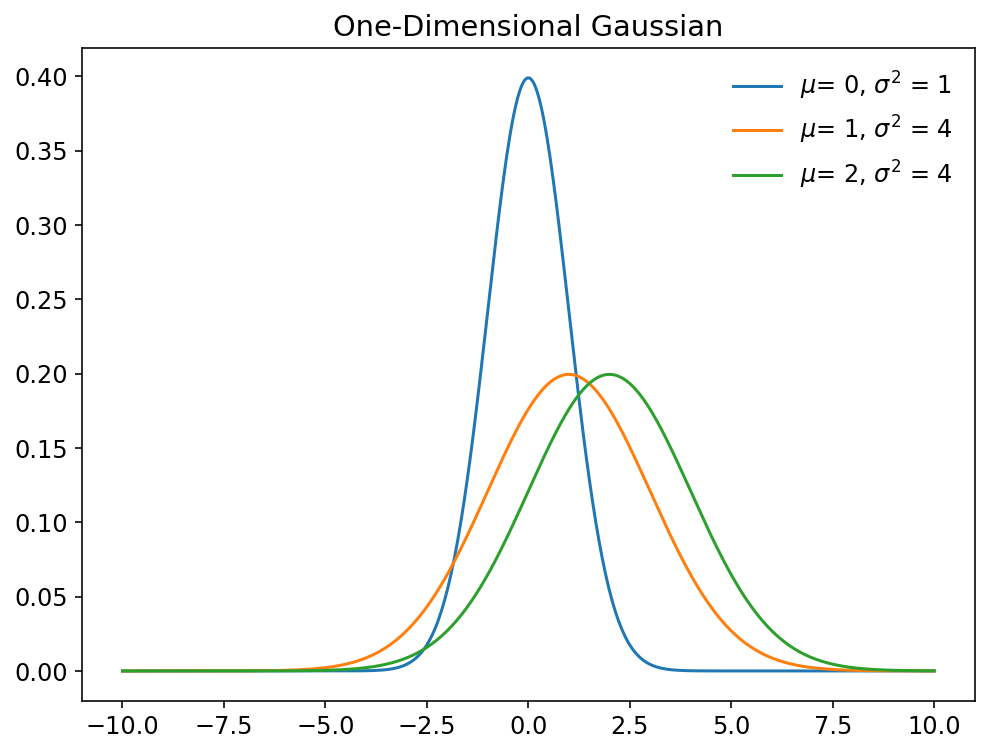

In [6]:
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] =12 

x = np.linspace(-10, 10, 500)

list_mean = [0, 1, 2]
list_var = [1, 4, 4]   # sigma^2

for m, v in zip(list_mean, list_var):

    y = norm(m, np.sqrt(v)).pdf(x)
    plt.plot(x, y, label='$\mu$= {}, $\sigma^2 $ = {}'.format(m, v))
    plt.legend(frameon=False)
    plt.title('One-Dimensional Gaussian')

plt.show()

(800, 800)
(800, 800)
(800, 800)


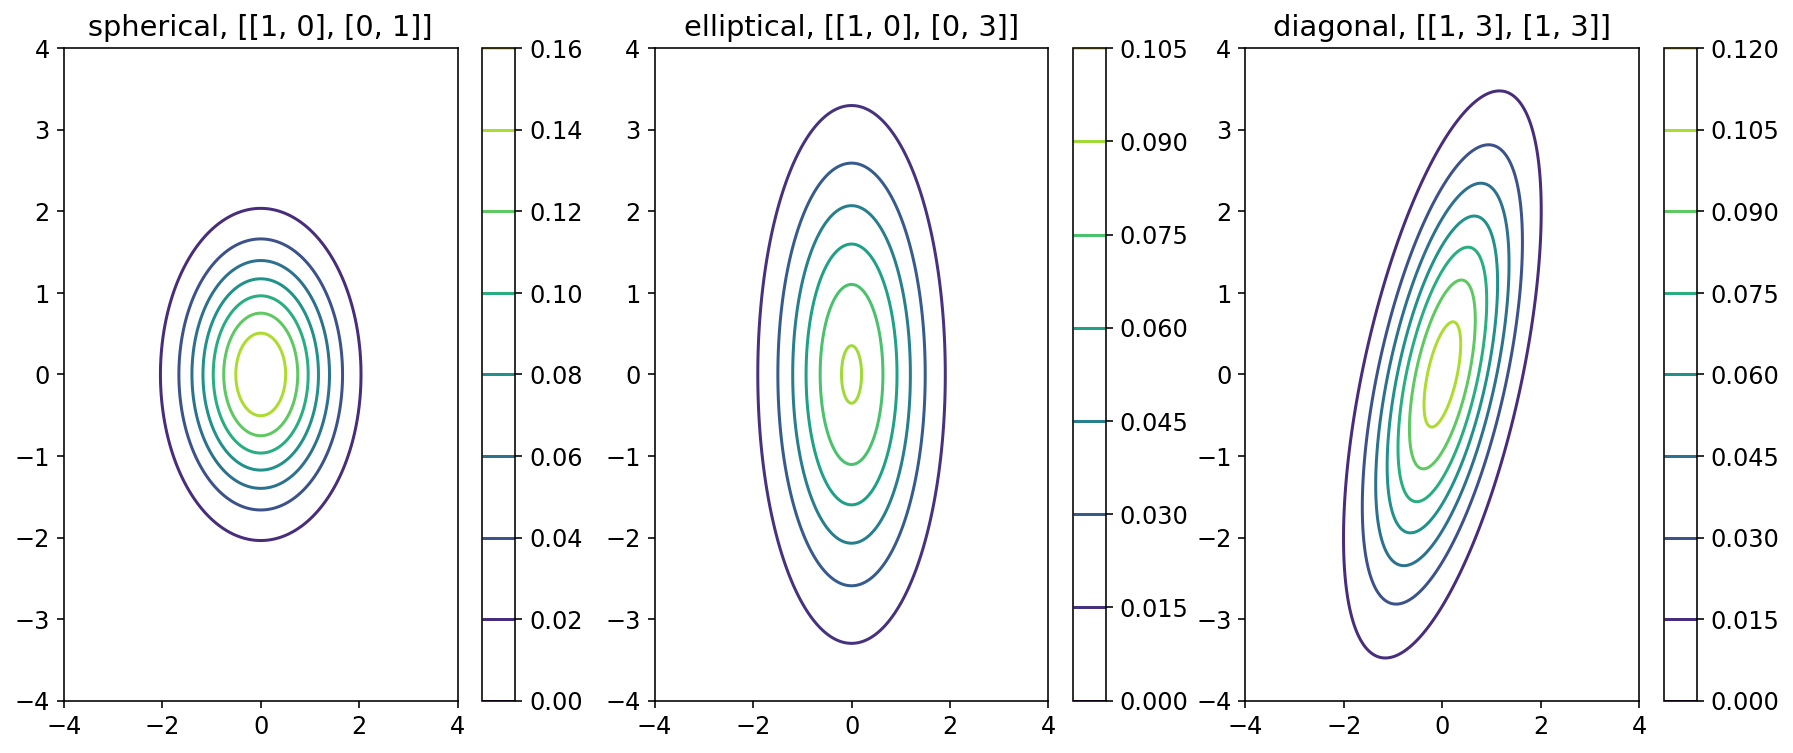

In [23]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
#print (x.shape)
# define a new array of a given shape and size without defining entries.

position = np.empty(x.shape + (2, ))  
# Initializing entries.

position[:, :, 0] = x
position[:, :, 1] = y

titles = ['spherical', 'elliptical', 'diagonal']
covariances = [ [[1, 0], [0, 1]], [[1, 0], [0, 3]], [[1, 3], [1, 3]] ]

plt.figure(figsize=(15, 6))

for i in range(3):

    plt.subplot(1, 3, i + 1)
    z = multivariate_normal([0, 0], covariances[i]).pdf(position)
    print (z.shape)
    plt.contour(x, y, z)
    plt.title('{}, {}'.format(titles[i], covariances[i]))
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.colorbar()

plt.show()

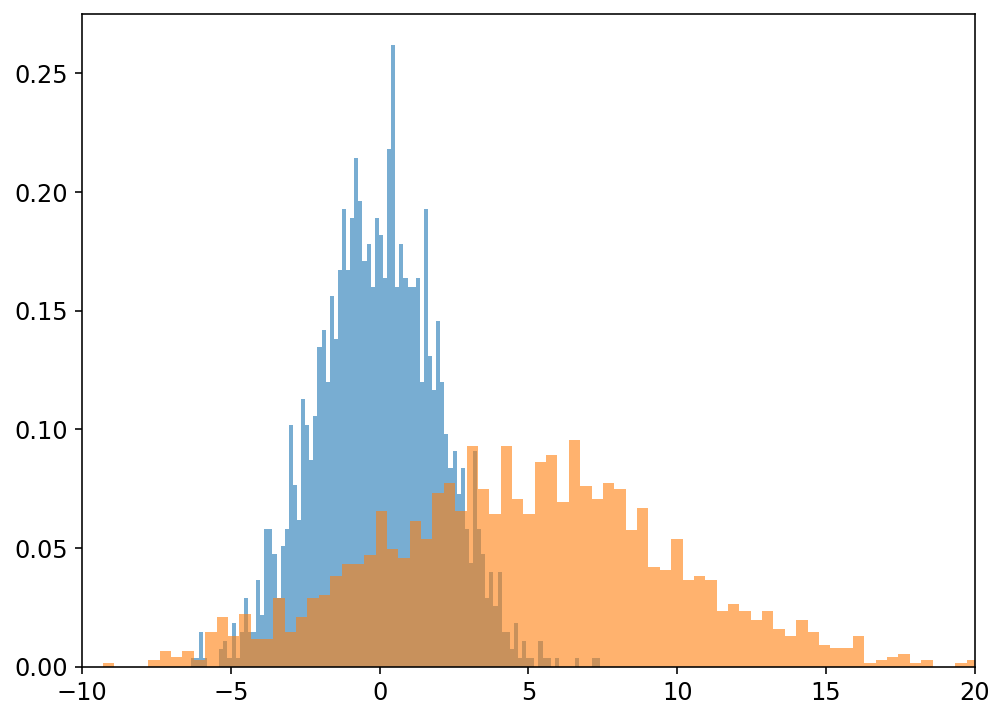

In [33]:
np.random.seed(3)

x1 = np.random.normal(0, 2, size=2000)
x2 = np.random.normal(5, 5, size=2000)

data = [x1, x2]

# density true means the area under the histogram integrates to 1.0
# density = counts / (sum(counts) * np.diff(bins))
# np.sum(density * np.diff(bins)) == 1

def plot_hist(data, bins):

    for x in data:
        plt.hist(x, bins = bins, density=True, cumulative=False, alpha=0.6)

    plt.xlim(-10, 20)

plot_hist(data, bins=100)

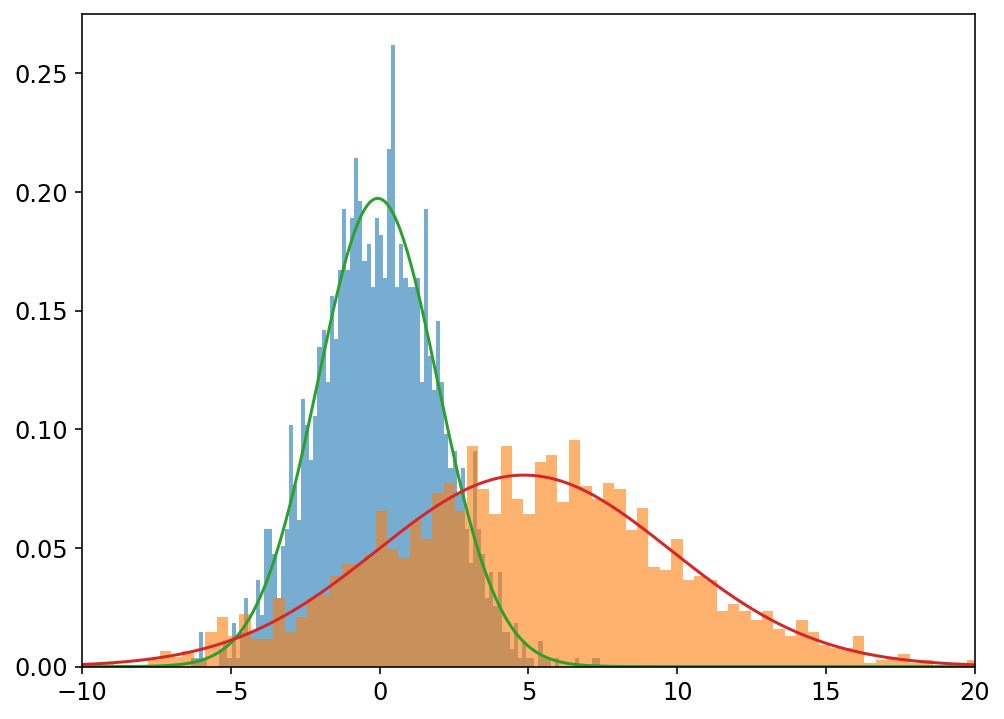

In [34]:
x1_mean, x1_var = np.mean(x1), np.var(x1)
x2_mean, x2_var = np.mean(x2), np.var(x2)

x_mean = [x1_mean, x2_mean]
x_var = [x1_var, x2_var]

def plot_gaussian(x_mean, x_var):

    x = np.linspace(start = -10, stop=20, num=500)
    for m, v in zip(x_mean, x_var):
        y = norm(m, np.sqrt(v)).pdf(x)
        plt.plot(x, y)

plot_hist(data, bins=100)
plot_gaussian(x_mean, x_var)